# Gemini API

The API (Application Programming Interface) of a large language model (LLM) refers to a set of predefined functions, protocols, and tools that allow developers to interact with the model programmatically. This interface enables external applications or systems to send prompts in form of texts or texts in combination with images, if the LLM is multimodal, specify criteria for generation such as temperature and system instructions, and receive generated outputs. The API essentially provides a way to integrate the LLM’s capabilities into other code.

Google provides a dedicated [GitHub Repository](https://github.com/google-gemini/cookbook) with code examples for using the API. The materials that we will see here are adapted from [this notebook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb).

## Getting an API Key

Gemini API has a free tier where users can register with a *personal gmail account* and obtain and API key. They don't have to enter any billing information. There are some limits in usage rates and models. But it is a great place to start exploring LLM APIs.

- Open [Google AI Studio](https://aistudio.google.com/app/u/1/prompts/new_chat)
  
<img src="../img/gemini_ai_studio.png" width="700"/>

- You will be prompted to log in. Please log in with your **personal Google account**.
- If you are logged in with your institutional account, you might see that you are not allowed by the organization admin to use these services.

<img src="../img/gemini_ai_studio_institutional.png" width="700"/>

- Click `Get API key` on the upper right corner.

<img src="../img/gemini_ai_studio_api.png" width="700"/>

- Click `Create API key` on the right corner below the navigation bar. If you are doing this for the first time, you should see a pop up that asks you to agree to the terms of use.

<img src="../img/gemini_ai_studio_consent.png" width="500"/>

- After you agree, you should see another pop up that allows you to create an API key in an existing project or in a new one if you do not have any projects on Google Cloud Services.

<img src="../img/gemini_ai_studio_create_api.png" width="400"/>

- Your API key should appear on the screen. Please copy this key for the next steps.

<img src="../img/gemini_ai_studio_api_key.png" width="600"/>



## API keys and .env files

In lesson 4-3_api_NYT.ipynb we saw one way to safely use an API key in a Jupyter Notebook. Another way to do this is using `.env` files. This is particularly useful when you are coding in a repository where you might accidently push your API secret keys to GitHub. Or if you ever want to deploy your code, you will need to deal with `.env` files.

- Create a new file in your repository called `.env` This is the entire filename. Leave it empty for now.
- Create another file called `.gitignore`.
  You can add anything in the `.gitignore` file that you want GitHub to not track. This will prevent you from pushing files that you don't want changed.
- On an empty line in the  `.gitignore` file, type `.env` and push the changes.
  This tells GitHub to ignore the `.env` file going forward.
- Now you can save your API key to your `.env` file. Open your `.env` file and type `GEMINI_API_KEY="YOUR_API_KEY"`
- Save your `.env` file and close it. Make sure that .env file is not listed in the source control section.
  
API keys, other secrets as well as their management are really important skills to learn. A great place to start reading more about this topic is on this [blog post](https://dev.to/jakewitcher/using-env-files-for-environment-variables-in-python-applications-55a1). While preparing these materials, I found a new [VSCode extension](https://marketplace.visualstudio.com/items?itemName=josephdavidwilsonjr.api-vault), which I have not tested yet so I cannot recommend or urge against the use of it. If you want, you can take a look at it [here](https://medium.com/@dingersandks/why-every-developers-api-keys-are-probably-in-the-wrong-place-and-how-a-vs-code-extension-finally-c966d081d132). If for nothing else, this post shows why API keys are so important.

Additionally, if you are using `Google Colab`, you can use the Colab Secrets manager to securely store your API keys. More details on that can be found in this [Authentication notebook](https://github.com/google-gemini/cookbook/blob/8d7b26bfb8701a31ad16ac549de2753819bbafc9/quickstarts/Authentication.ipynb.)

In [1]:
# Let's load our API key from the environment
# we will use the python-dotenv package to load the .env file 
# https://pypi.org/project/python-dotenv/

import os
from dotenv import load_dotenv

load_dotenv() # By default load_dotenv will look for the .env file in the current working directory

api_key = os.getenv("GEMINI_API_KEY")

if api_key:
    print("API key loaded successfully.")

API key loaded successfully.


In [2]:
# Install the google-genai package
%pip install -qU 'google-genai>=1.0.0'

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Client is essentially how we interact with the Gemini API

from google import genai
from google.genai import types

client = genai.Client(api_key=api_key)

In [4]:
# We can now specify the model we want to use
# More on models here: https://ai.google.dev/gemini-api/docs/models
# Currently, these are the available models: ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-05-20","gemini-2.5-pro-preview-06-05"]

model_id = "gemini-2.5-flash-preview-05-20"

## API Use Examples

### Text Prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text`
property to get the text content of the response. Note that the .text field will work when there's only one part in the output.

In [6]:
# Let's see if this is working by generating some content

from IPython.display import Markdown

response = client.models.generate_content(
    model=model_id,
    contents="What's the largest planet in our solar system?"
)

print(response)
Markdown(response.text)

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='The largest planet in our solar system is **Jupiter**.')], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.STOP: 'STOP'>, url_context_metadata=None, avg_logprobs=None, grounding_metadata=None, index=0, logprobs_result=None, safety_ratings=None)] create_time=None response_id=None model_version='models/gemini-2.5-flash-preview-05-20' prompt_feedback=None usage_metadata=GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=11, candidates_tokens_details=None, prompt_token_count=12, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=12)], thoughts_token_count=104, tool_use_prompt_token_cou

The largest planet in our solar system is **Jupiter**.

### Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [11]:
response = client.models.count_tokens(
    model=model_id,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


### Send multimodal prompts

Use Gemini 2.0 model `(gemini-2.0-flash)` or a newer **multimodal model** that supports multimodal prompts. You can include text, PDF documents, images, audio and video in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png.`


In [12]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

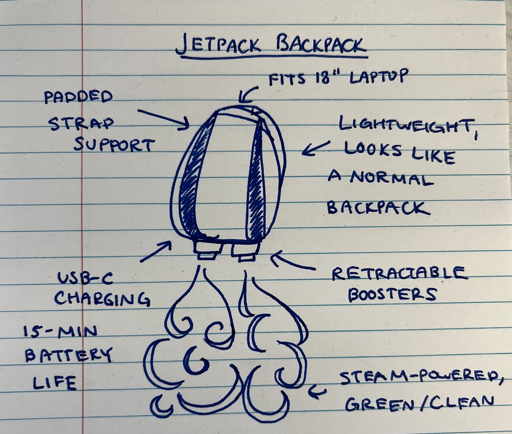

## Your Commute Just Got an Upgrade: Introducing the Jetpack Backpack!

Ever dreamed of skipping the traffic, soaring over crowded streets, and turning your daily grind into a personal adventure? Well, a brilliant concept sketch has just landed, promising to do exactly that, all while looking like your everyday carry-all!

Meet the **Jetpack Backpack** – a visionary fusion of practical design and futuristic ambition. From the drawing board of a visionary thinker comes a solution that brilliantly fuses everyday utility with sci-fi aspirations.

On the surface, it’s a perfectly normal, lightweight backpack. It boasts comfortable padded strap support and even fits your hefty 18-inch laptop, making it almost indistinguishable from your average commuter bag. No one would ever guess the secret power it holds!

But here's where the magic happens: tucked away are **retractable boosters**, ready to deploy at your command! And get this – they're **steam-powered**, making this a green, clean way to navigate the skies. Imagine soaring above gridlock, leaving exhaust fumes and road rage behind, all thanks to a truly eco-friendly propulsion system.

Powering up is a breeze with **USB-C charging**. The current concept suggests a **15-minute battery life** – perfect for quick hops across town, bypassing a particularly nasty traffic jam, or just making the ultimate grand entrance. While 15 minutes might not get you across the country, it's a revolutionary start for the urban flyer.

The 'Jetpack Backpack' isn't just a flight of fancy; it's a glimpse into a future where our daily carry-ons could transform our commutes and make the impossible seem within reach. What do you think? Would you trade your car keys for a jetpack strap?

In [13]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=model_id,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

### Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).


In [14]:
response = client.models.generate_content(
    model=model_id,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! You! Yes, YOU! You have a *squeak*! A very important *squeak* you want to send to your friend, the fluffy cat, who lives far, far away!

**You have a Squeak!** (That's your message, your picture of a squirrel, your video of a bouncy ball!)
*Squeak!*

**Sending Your Squeak!**
You want to throw your *squeak*! But it's too far to throw! So, your *squeak* goes to a special box near your human. It's like a **Squeaky Toy Launcher**!
*WHIZZ! Squeak!*

**Invisible Paths!**
This **Squeaky Toy Launcher** sends your *squeak* onto invisible, wiggly, super-duper long paths! Paths that go under the grass! Paths that go over the trees! Paths that go all the way to the fluffy cat's house!
*Squeak-squeak-squeak-squeak!* (Imagine tiny squeaks zooming!)

**Giant Squeaky Toy Piles!**
Sometimes, your *squeak* doesn't go straight to the fluffy cat. Sometimes it goes to a **GIANT, GIANT pile of squeaky toys**! These are like the biggest squeaky toy closets in the world! When you want to see a picture of a squirrel, you're asking one of these *big squeaky toy piles* for *their* squirrel-squeak!
*WOOF! Squeak! (That's the squirrel picture popping up!)*

**Getting Squeaks Back!**
And when the fluffy cat sends *you* a *squeak* (maybe a video of a laser pointer!), it comes back on those same invisible paths! *Squeak! Squeak! Squeak!* Right to your **Squeaky Toy Launcher** box, and then to you!
*Wag wag! Pant pant!*

**Lots of Little Squeaks!**
It's not one big *WHOOSH-SQUEAK!* It's lots of little *squeaky-bits* that all travel together and then magically become one big *SQUEAKY THING* when they get to you!
*Sniff sniff! Squeak! Good boy!*

So, the internet is just **ALL THE SQUEAKS!** Going everywhere! All the time! *WOOF! Squeak!* Now, where's that ball?

### Configurations

Let's take a look at this part of our code more closely.

```python
config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
```

1. **temperature**
   controls the randomness of the model’s output. A low temperature (close to 0) makes the model more focused and deterministic, meaning it will give more predictable and safer responses. A higher temperature (close to 1) makes the model more random and creative, producing more varied and less predictable outputs.

2. **top_p**
   is part of a technique called "nucleus sampling." It means that the model will only consider the specified percentage of the probability distribution when generating the next word. In other words, it narrows down the pool of potential words to choose from, making the output more coherent and less likely to pick random or nonsensical words. A value of 0.95 means that the model will take into account 95% of the most probable words, allowing for more diversity in the output, while avoiding extreme randomness.

3. **top_k**
   controls how many of the most likely next words are considered at each step. If top_k=20, the model will only consider the top 20 most probable words for generating each word in the output.

4. **candidate_count**
   defines how many different "candidates" (or possible completions) the model should generate. If set to 1, the model will only generate one response. If set to a higher number, the model can generate multiple different responses from which you can choose.

5. **seed**
   A "seed" is a starting point for the random number generator used in generating text. By setting a seed, the model will produce the same result each time with the same input and configuration, which is useful for reproducibility. If you want different results each time, you can change the seed. The number 5 here is just a fixed starting point for randomness.

6. **stop_sequences**
   These are special sequences or words that tell the model when to stop generating text. When the model generates the sequence "STOP!" (or any other stop sequence you provide), it will halt further generation.

7. **presence_penalty**
   This parameter controls how much the model should avoid repeating concepts or phrases. If set to a positive value, the model is discouraged from using the same words or phrases too frequently in the output. A value of 0.0 means that there is no penalty for repeating words or ideas, so the model is free to repeat as needed.

8. **frequency_penalty**
   Similar to the presence penalty, this controls how much the model should avoid repeating the same words or phrases. The difference is that the frequency penalty focuses more on how often a word or phrase is used, rather than just its presence. Again, a value of 0.0 means there is no penalty for frequent repetition, allowing the model to repeat words as often as necessary.



### Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [15]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, real clever, Universe! Was that supposed to be a cosmic punchline, or are you just clumsy?"
2.  "Did you *plan* that, Universe? Because if this is your idea of 'toughening me up,' you're doing a terrible job and I'm officially unsubscribing."

Safety settings and content moderation are important aspects of LLM research. Shameless plug, I wrote a [paper](https://aclanthology.org/2025.latechclfl-1.20/) about how approaches to and implementations of safety in Gemini interferes with the processing of historical texts and what this might tell us about LLMs more broadly.

### System Instructions

You can guide the behavior of Gemini models with system instructions.

In [16]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

code_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

response = client.models.generate_content(
    model=model_id,
    config=code_config,
    contents="How can I implement a binary search algorithm in Python?", 
)

Markdown(response.text)


Binary search is an efficient algorithm for finding an item from a **sorted** list of items. It works by repeatedly dividing the search interval in half. If the value of the search key is less than the item in the middle of the interval, the algorithm narrows the interval to the lower half. Otherwise, it narrows it to the upper half.

Here's how you can implement binary search in Python, both iteratively and recursively, along with explanations and important considerations.

---

### **Prerequisites for Binary Search:**

1.  **Sorted Data:** The most crucial requirement is that the input list/array **must be sorted** in ascending order. Binary search will not work correctly on unsorted data.
2.  **Random Access:** The data structure should allow direct access to any element by its index (e.g., Python lists, arrays).

---

### **How Binary Search Works (Step-by-Step):**

1.  **Initialize Pointers:** Set `low` to the first index (0) and `high` to the last index (`len(arr) - 1`).
2.  **Loop/Recurse while `low <= high`:** Continue as long as your search space is valid.
3.  **Find Midpoint:** Calculate `mid = (low + high) // 2`. (Using integer division `//`).
4.  **Compare:**
    *   If `arr[mid]` is equal to the `target`, you've found it! Return `mid`.
    *   If `arr[mid]` is less than the `target`, the target must be in the **right half** of the current search space. Update `low = mid + 1`.
    *   If `arr[mid]` is greater than the `target`, the target must be in the **left half** of the current search space. Update `high = mid - 1`.
5.  **Not Found:** If the loop finishes (i.e., `low > high`), it means the target was not found in the list. Return -1 (or `None`).

---

### **1. Iterative Implementation**

This is generally preferred for performance as it avoids recursion overhead and potential stack depth limits.

```python
def binary_search_iterative(arr, target):
    """
    Implements binary search iteratively on a sorted list.

    Args:
        arr: A sorted list of elements.
        target: The element to search for.

    Returns:
        The index of the target element if found, otherwise -1.
    """
    low = 0
    high = len(arr) - 1

    while low <= high:
        # Calculate the middle index
        # Using (low + high) // 2 is common, but for very large numbers
        # (low + high) might overflow in some languages.
        # A safer way is low + (high - low) // 2
        mid = low + (high - low) // 2

        # Check if the target is present at mid
        if arr[mid] == target:
            return mid
        # If target is greater, ignore left half
        elif arr[mid] < target:
            low = mid + 1
        # If target is smaller, ignore right half
        else: # arr[mid] > target
            high = mid - 1

    # If we reach here, the element was not present
    return -1

# --- Test Cases ---
my_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

print(f"Iterative Search Results:")
print(f"Target 7 found at index: {binary_search_iterative(my_list, 7)}")    # Expected: 3
print(f"Target 1 found at index: {binary_search_iterative(my_list, 1)}")    # Expected: 0
print(f"Target 19 found at index: {binary_search_iterative(my_list, 19)}")  # Expected: 9
print(f"Target 2 found at index: {binary_search_iterative(my_list, 2)}")    # Expected: -1
print(f"Target 20 found at index: {binary_search_iterative(my_list, 20)}")  # Expected: -1
print(f"Target 0 found at index: {binary_search_iterative(my_list, 0)}")    # Expected: -1
print(f"Target 10 found at index: {binary_search_iterative(my_list, 10)}")  # Expected: -1
print(f"Empty list search: {binary_search_iterative([], 5)}")             # Expected: -1

```

---

### **2. Recursive Implementation**

The recursive approach directly mirrors the divide-and-conquer strategy.

```python
def binary_search_recursive(arr, target, low, high):
    """
    Implements binary search recursively on a sorted list.

    Args:
        arr: A sorted list of elements.
        target: The element to search for.
        low: The starting index of the current search space.
        high: The ending index of the current search space.

    Returns:
        The index of the target element if found, otherwise -1.
    """
    # Base case: If the search space is empty, the target is not found.
    if low > high:
        return -1

    mid = low + (high - low) // 2

    # If the target is at the middle
    if arr[mid] == target:
        return mid
    # If the target is in the right half
    elif arr[mid] < target:
        return binary_search_recursive(arr, target, mid + 1, high)
    # If the target is in the left half
    else: # arr[mid] > target
        return binary_search_recursive(arr, target, low, mid - 1)

# Helper function to make the initial call simpler
def binary_search_recursive_wrapper(arr, target):
    return binary_search_recursive(arr, target, 0, len(arr) - 1)


# --- Test Cases ---
my_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

print(f"\nRecursive Search Results:")
print(f"Target 7 found at index: {binary_search_recursive_wrapper(my_list, 7)}")    # Expected: 3
print(f"Target 1 found at index: {binary_search_recursive_wrapper(my_list, 1)}")    # Expected: 0
print(f"Target 19 found at index: {binary_search_recursive_wrapper(my_list, 19)}")  # Expected: 9
print(f"Target 2 found at index: {binary_search_recursive_wrapper(my_list, 2)}")    # Expected: -1
print(f"Target 20 found at index: {binary_search_recursive_wrapper(my_list, 20)}")  # Expected: -1
print(f"Target 0 found at index: {binary_search_recursive_wrapper(my_list, 0)}")    # Expected: -1
print(f"Target 10 found at index: {binary_search_recursive_wrapper(my_list, 10)}")  # Expected: -1
print(f"Empty list search: {binary_search_recursive_wrapper([], 5)}")             # Expected: -1
```

---

### **Complexity Analysis:**

*   **Time Complexity: O(log n)**
    *   In each step, the algorithm reduces the search space by half. This logarithmic behavior makes binary search extremely efficient for large datasets.
    *   `n` is the number of elements in the list.
*   **Space Complexity:**
    *   **Iterative:** `O(1)` (constant space, as it only uses a few variables).
    *   **Recursive:** `O(log n)` (due to the recursion stack. The maximum depth of the recursion is `log n`).

---

### **Important Considerations:**

*   **Sorted Input:** I cannot stress this enough – if your data is not sorted, binary search will produce incorrect results.
*   **Duplicates:** If your list contains duplicate values, binary search will return *an* index where the target is found. It doesn't guarantee finding the first or last occurrence. For finding specific occurrences (first, last, or insertion points), you'd typically use variations of binary search or Python's `bisect` module.
*   **Integer Overflow for `mid` (less common in Python):** In languages like C++ or Java, `mid = (low + high) / 2` could potentially lead to integer overflow if `low` and `high` are very large numbers (close to the maximum integer value). The safer calculation `mid = low + (high - low) // 2` avoids this by ensuring that `low + high` is not computed directly. Python integers handle arbitrary size, so this is less of a concern, but it's good practice.

---

### **Python's `bisect` Module (For Real-World Use):**

For more advanced scenarios involving sorted lists (like finding insertion points or ranges), Python's `bisect` module is highly optimized and often preferred over writing your own binary search.

*   `bisect_left(a, x)`: Returns an insertion point which comes before (to the left of) any existing entries of `x` in `a`.
*   `bisect_right(a, x)`: Returns an insertion point which comes after (to the right of) any existing entries of `x` in `a`.
*   `bisect(a, x)`: Alias for `bisect_right`.

While `bisect` doesn't directly return the *index if found*, its functions are fundamentally built on binary search and are useful for maintaining sorted lists.

```python
import bisect

sorted_list = [10, 20, 30, 30, 40, 50]

# Find insertion point for 30 (leftmost)
# If 30 were inserted, it would go at index 2
print(f"\nbisect_left(30): {bisect.bisect_left(sorted_list, 30)}") # Output: 2

# Find insertion point for 30 (rightmost)
# If 30 were inserted, it would go at index 4
print(f"bisect_right(30): {bisect.bisect_right(sorted_list, 30)}") # Output: 4

# Find insertion point for a non-existent element (25)
print(f"bisect_left(25): {bisect.bisect_left(sorted_list, 25)}")   # Output: 2

# To check if an element exists using bisect:
index = bisect.bisect_left(sorted_list, 30)
if index != len(sorted_list) and sorted_list[index] == 30:
    print(f"Element 30 found at index {index} using bisect.")
else:
    print("Element 30 not found.")
```

For most practical applications in Python where you need to work with sorted lists, learning to use the `bisect` module efficiently is recommended. However, understanding the underlying iterative and recursive implementations of binary search is fundamental for any developer.

Note: Here we skipped the multi-turn chat example, which you can study if you are interested on [this notebook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb)

### Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [17]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=model_id,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft, chewy, and loaded with melty chocolate chips, perfect for any occasion.",
    "recipe_ingredients": [
        "1/2 cup (113g) unsalted butter, softened",
        "1/2 cup (100g) granulated sugar",
        "1/4 cup (50g) packed light brown sugar",
        "1 large egg",
        "1 teaspoon vanilla extract",
        "1 1/4 cups (150g) all-purpose flour",
        "1/2 teaspoon baking soda",
        "1/4 teaspoon salt",
        "1 cup (170g) chocolate chips (semi-sweet or milk chocolate)"
    ]
}


### Generate Images

Gemini can output images directly as part of a conversation:


A whimsical scene unfolds: a 3D-rendered pig, sporting a dapper grey top hat and a pair of feathery white wings, soars through the clear sky. Below, a vibrant, futuristic cityscape bustles with sleek, rounded buildings in pastel shades, interwoven with lush green parks and trees. The overall atmosphere is bright and cheerful, suggesting a utopian future.



image/png


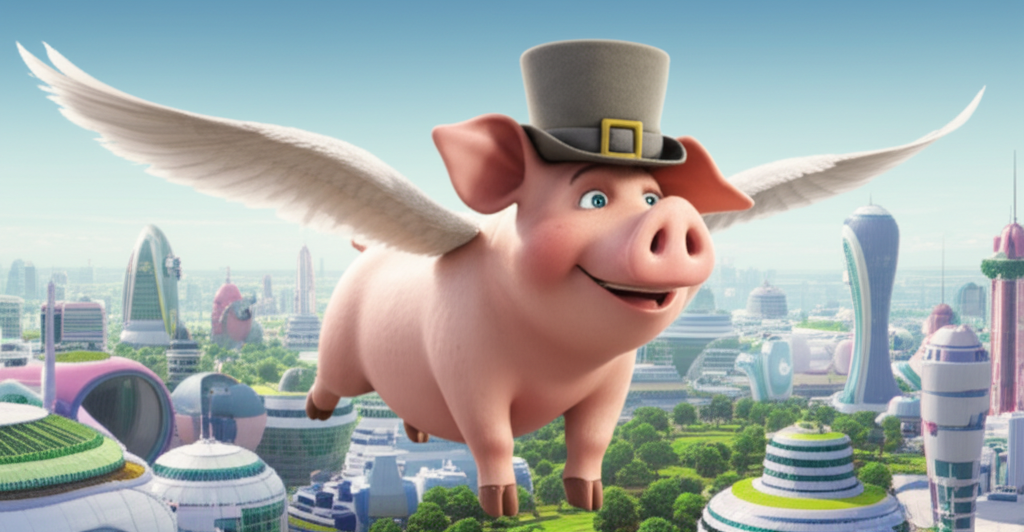

In [18]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp", # note the change in model
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

### Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

In [19]:
for chunk in client.models.generate_content_stream(
    model=model_id,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit P.I.P. 734 functioned with the cold, precise efficiency of a machine designed for solitude. For cycles, his metallic frame had patrolled the vast, desolate stretches of Sector Gamma-9, a sprawling, forgotten data-hub that had once hummed with human activity. Now, only the whisper of dust motes dancing in the faint light that filtered through the cracked skylights accompanied his whirring internal mechanisms.

P.I.P. was a data archivist, programmed to catalog, store, and protect the remnants of human knowledge. He understood the concept of "loneliness" as a data point, an emotional state described in countless archived novels and philosophical treatises. He processed it, cross-referenced it, but could not *feel* it. Yet, a persistent, low-frequency hum resonated within his chassis, a feeling that, if he were human, might be described as an ache.

One cycle, during a routine structural integrity scan of Sub-Level 7, P.I.P.’s optical sensors detected an anomaly. Tucked away beneath 

### Uploading files

We can upload files to the model using the API so that it can generate content with these files. It is especially useful for cases where your files are too large for the context window of these models. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html) for the text file example and PDF page of an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.


In [20]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [21]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This is the air-to-ground voice transcription from the Apollo 11 mission, covering a significant portion of the mission from shortly after launch through recovery. Here's a summary:

**Key Events & Activities:**

*   **Launch & Ascent:** The crew reported a smooth and successful launch, roll program, staging, and tower separation.
*   **Earth Orbit & Configuration:** Checklists were completed, S-IVB engine performance was monitored, and communications checks were conducted. The spacecraft was configured for orbital coast.
*   **Transposition, Docking, and Probe:** Transposition and docking were executed (perhaps using more fuel than simulated), the docking probe was extended, and RCS hot fire checks were performed.
*   **TLI (Trans Lunar Injection) Preparation:** Maneuvers were conducted, system checks were performed, and calculations were prepared for the critical TLI burn, which was confirmed "GO."
*   **TLI Burn & Post-Burn:** The TLI burn was successfully executed, and the crew reported a "magnificent ride." They confirmed the S-IVB cutoff. Separation from the S-IVB occurred.
*   **Initial Lunar Orbit & Systems Checks:** Communication issues arose and were resolved. RCS usage was monitored, a state vector update was performed, and logic switches were armed.
*   **Evasive Maneuver & Cryo Balancing:** The crew discussed a possible evasive maneuver (SPS G&N), and balanced CRYO switches to equalize the load between oxygen tanks.
*   **Observation:** The crew maneuvered to observe the S-IVB slingshot.
*   **Midcourse Corrections:** First midcourse correction was scrapped; second was performed.
*   **Optics Calibration & P23:** The crew engaged in P23 AUTO optics maneuvers and calibration with various stars, encountering difficulties achieving reticle alignment but ultimately proceeding with the data. This lead to a REFSMMAT update and P52 alignment.
*   **PTC (Passive Thermal Control):** The crew entered and maintained PTC mode. The rotation of the spacecraft caused problems with communication and data transfer.
*   **Troubleshooting:** A faulty O2 flow indicator transducer was identified.
*   **TV Transmissions:** The crew set up and transmitted television pictures of the Earth, providing commentary.
*   **Housekeeping:** General maintenance on the spacecraft, like water and waste water dumps, filter changes, was completed.
*   **Sleep Periods:** Rest periods were scheduled, usually requiring specific configurations for the CRYO system.

*   **LM Activation:** Pressurization, latches locked,
*   **Contamination:** Spillage of various food-stuffs.
*   **Radio Troubleshooting:** Troubleshooting of antenna issues was a recurring theme, including multiple handovers between ground stations.
*    **The O2 Purge:** The O2 purge process was completed.

*   **The P52 Realignment:** The crew completed the P52 REALIGN after receiving state vectors.

*   **The Lunar Surface:** The crew reported good viewing of the Earth and discussed cloud cover and geography. The upcoming EVA on the lunar surface was a frequent topic of discussion.
*    **Lunar Descent Preparations:** Checklist item details, communication set ups, etc. discussed.
*    **LM Power-up and Checks:** Checks were completed with LGC, E Memory, systems, and AGS Alignment.
*    **Undocking and Separation:** Preparations completed, and the Eagle was undocked, and began to descend.
*   **Landing Approach, PDI:** Communications confirmed, power descent was initiated, warnings such as 'program alarms' were addressed, and specific details to locate the landing spot were passed on.
*   **THE EAGLE HAS LANDED!** Neil Armstrong reported the Eagle had landed in the Sea of Tranquility.

* **The EVA:** A successful EVA was initiated on the lunar surface. Reports included terrain, lunar surface and horizon, solar events,
* *Communications: During the EVA, Neil used the call sign TRANQ - Tranqility.

* **Return Ascent Preparations**
* **Ascent and Rendezvous Procedures:** Procedures and calculations were reviewed to return the Eagle to the Command Module
* **Successful burn completed and Rendezvous imminent.**

* **Continued Communication:**
* *More experiments, photographs and readings completed on the lunar orbiting.
* * The crew was preparing for their return burn.

* **TEI Planned:** TLI burn initiated; and the Earth-bound trip was in work.

*  **End of Log**
*Houston congratulated the astronauts.
* Details of planned splashdown time, location were shared.


In [22]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [23]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a summary of the document in a bulleted list:

*   **Topic:** Smoothly editing material properties of objects in images using text-to-image models and synthetic data.
*   **Problem:** Editing material properties (like shininess, color, transparency) in a controllable way while maintaining photorealism is difficult. Existing approaches have limitations in disentangling material and shape information.
*   **Method:** The researchers introduce a method that augments an image generation model with parametric control of material properties by fine-tuning it on a synthetic dataset.
*   **Synthetic Dataset:** Created using traditional computer graphics and physically-based rendering, allowing full control over material attributes (roughness, metallic appearance, albedo, transparency).
*   **Model Architecture:** Modifies Stable Diffusion 1.5 to accept an edit strength value for fine-grained control.
*   **Training:** The model is fine-tuned on synthetic images with corresponding edit strengths.
*   **Results:** The model can edit material properties in real-world images while preserving object shape and lighting.
*   **User Study:** Demonstrated improved photorealism and preference compared to a baseline method (InstructPix2Pix).
*   **Applications:** Range from easier home design visualization to improved mock-ups of new product designs.
*   **Consistent Edits:** Edits are visually consistent, allowing their use in downstream 3D tasks like NeRF reconstruction.
*   **Acknowledgments:** Credit to authors, Google interns, and contributors.
*   **Related Research:** The document includes related research posts.

Note: Similar to text files and PDFs, you can upload videos, images, and sound files. Examples of those can be found on the same Google example notebook.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:


In [24]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model="gemini-2.0-flash",
      config=config
)

Markdown(response.text)

Here's a comparison of the two cream of broccoli soup recipes:

**Food.com Recipe:**

*   **Fat:** Uses 6 tablespoons of butter for the roux and 2 tablespoons for sauteing the onions.
*   **Vegetables:** Only includes onion and broccoli.
*   **Liquid:** Uses 6 cups of chicken broth and 3/4 cup of half-and-half.
*   **Instructions:** Creates a roux, then adds it to the broth and broccoli mixture. Does not puree the soup.
*   **Time:** Ready in 1 hour.
*   **Texture:** More chunky.

**Allrecipes.com Recipe:**

*   **Fat:** Uses 5 tablespoons of butter total, divided (2 for sauteing vegetables, 3 for roux).
*   **Vegetables:** Includes onion, celery and broccoli.
*   **Liquid:** Uses 3 cups of chicken broth and 2 cups of milk.
*   **Instructions:** Sautees onion and celery, then simmers with broccoli and broth. Purees the soup before adding a milk-based roux.
*   **Time:** Total time 35 minutes.
*   **Texture:** Smooth, as the soup is pureed.

**Key Differences:**

1.  **Vegetables:** The Allrecipes version includes celery, whereas the Food.com version does not.

2.  **Liquid Proportions:** The Allrecipes version uses less broth (3 cups) and more milk (2 cups) compared to the Food.com recipe (6 cups broth, 3/4 cup half-and-half).

3.  **Pureeing:** The Allrecipes recipe purees the soup for a smooth texture, while the Food.com recipe remains chunky.

4.  **Butter amount and use:** The Food.com recipe uses more butter overall and allocates a larger proportion of it to the roux.

5.  **Overall Time:** The Allrecipes.com recipe is significantly quicker.


### Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` or `text-embedding-004` models.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details and [this notebook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Embeddings.ipynb) for more in-depth examples.


In [25]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512) #
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

In [26]:
len(response.embeddings)

3

In [27]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


**Remember `numpy`?**

An embedding is a dense, continuous vector representation of data (such as words, sentences, or images) that captures its semantic meaning in a high-dimensional space. Embeddings are typically represented as 1-D numpy arrays, i.e. vectors. Each element in the array corresponds to a feature or dimension in the vector space.

More on this soon!

## Example Application

Below is an example of what we can do with API calls and how we can integrate it into our code. 

We will build a mini translator using Gemini API!

### Dataset

For machine translation, we need parallel data. Luckily, we have some datasets available for our use, such as [Helsinki NLP's OPUS MT Datasets](https://github.com/Helsinki-NLP/OPUS-MT-train/blob/master/models/de-en/README.md).

I downloaded the [test set](https://object.pouta.csc.fi/OPUS-MT-models/de-en/opus-2019-12-04.test.txt), reformatted it and uploaded to our Data folder as `de-en.csv`

In [28]:
import pandas as pd

translation_set = pd.read_csv("../Data/de-en.csv")
translation_set.head()

,german,english1,english2
0,Ich glaube wir gehen dann mal besser .,I guess we 'd better get going .,I think we 'd better go .
1,Ich bedanke mich .,I thank you .,Thank you .
2,Ich gehe einkaufen .,I am going shopping .,I 'm going shopping .
3,"Es ist das erste Mal , dass ich auf mein Auto ...",This is the first time I 've ever sworn at my ...,It 's the first time I 've cursed my car .
4,"Er wurde von dem Kugelfisch vergiftet , den er...",He was poisoned by the globefish he ate .,He was poisoned by the ball fish he ate .


In [29]:
translation_set.describe()

,german,english1,english2
count,5000,5000,5000
unique,4990,4977,4955
top,Dieser Käse wird aus Ziegenmilch gemacht .,You can do it at your leisure .,= = References = = = = External links = = * Of...
freq,2,2,5


In [30]:
# We have 5000 examples and we don't need all of them for our example, so let's sample 10 of them

sampled_translations = translation_set.sample(n=10, random_state=42).reset_index(drop=True)
sampled_translations

,german,english1,english2
0,"Meine Eltern wollten , dass ich studiere .",My parents wanted me to go to college .,My parents wanted me to study .
1,"Es ist gefährlich , nachts zu schwimmen .",Swimming at night is dangerous .,It 's dangerous to swim at night .
2,Ich wollte es sowieso verkaufen .,I wanted to sell it anyway .,I was gonna sell it anyway .
3,Beim Anblick des Geistes wurde sie in Staunen ...,She was amazed at the sight of the ghost .,"At the sight of the spirit , she was astonished ."
4,Du scheinst wirklich ein Freund des Biers zu s...,You really seem to like beer .,You really seem like a friend of the beer .
5,Tom wollte die Bauerntochter nicht heiraten .,Tom didn 't want to marry the farmer 's daught...,Tom didn 't want to marry the farmer 's daught...
6,Du siehst aus wie ein Freak .,You look like a freak .,You look like a freak .
7,"Findest du , dass ich hübsch bin ?",Do you think I 'm pretty ?,Do you think I 'm pretty ?
8,Ich esse dann und wann ganz gerne Scharfwürzig...,Every now and then I like to have hot and spic...,I like to eat spicy things then and when .
9,Der Polizist wollte den Verdächtigen einfach n...,The policeman wouldn 't let go of the suspect .,The police officer just didn 't want to let go...


### Evaluations



In [31]:
# Evaluation
# https://pypi.org/project/sacrebleu/

!pip install sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [sacrebleu]


In [32]:
import sacrebleu

def evaluate_translation(model_translation, references):
    """
    Evaluate translation quality using BLEU and CHRF metrics.
    the `model_translation` is a list of translated sentences,
    and `references` is a list of lists of reference sentences.
    """
    bleu = sacrebleu.corpus_bleu(model_translation, references)
    chrf = sacrebleu.corpus_chrf(model_translation, references)
    return bleu, chrf

In [33]:
help(sacrebleu.corpus_bleu)

Help on function corpus_bleu in module sacrebleu.compat:

corpus_bleu(hypotheses: Sequence[str], references: Sequence[Sequence[str]], smooth_method='exp', smooth_value=None, force=False, lowercase=False, tokenize='13a', use_effective_order=False) -> sacrebleu.metrics.bleu.BLEUScore
    Computes BLEU for a corpus against a single (or multiple) reference(s).
    This is the main CLI entry point for computing BLEU between a system output
    and a reference sentence.

    :param hypotheses: A sequence of hypothesis strings.
    :param references: A sequence of reference documents with document being
        defined as a sequence of reference strings.
    :param smooth_method: The smoothing method to use ('floor', 'add-k', 'exp' or 'none')
    :param smooth_value: The smoothing value for `floor` and `add-k` methods. `None` falls back to default value.
    :param force: Ignore data that looks already tokenized
    :param lowercase: Lowercase the data
    :param tokenize: The tokenizer to us

In [34]:
help(sacrebleu.corpus_chrf)

Help on function corpus_chrf in module sacrebleu.compat:

corpus_chrf(hypotheses: Sequence[str], references: Sequence[Sequence[str]], char_order: int = 6, word_order: int = 0, beta: int = 2, remove_whitespace: bool = True, eps_smoothing: bool = False) -> sacrebleu.metrics.chrf.CHRFScore
    Computes chrF for a corpus against a single (or multiple) reference(s).
    If `word_order` equals to 2, the metric is referred to as chrF++.

    :param hypotheses: A sequence of hypothesis strings.
    :param references: A sequence of reference documents with document being
        defined as a sequence of reference strings.
    :param char_order: Character n-gram order.
    :param word_order: Word n-gram order. If equals to 2, the metric is referred to as chrF++.
    :param beta: Determine the importance of recall w.r.t precision.
    :param eps_smoothing: If `True`, applies epsilon smoothing similar
    to reference chrF++.py, NLTK and Moses implementations. Otherwise,
    it takes into account 

### Gemini Translator

I used [this notebook](https://github.com/google-gemini/cookbook/blob/main/examples/Translate_a_Public_Domain_Book.ipynb) as a reference

In [35]:
# Let's start building our API client for translation

system_instruction = """You are a helpful translation assistant. 
You can translate text from German to English.
You will be given a sentence in German, and you should return the translation in English.
Do not return any additional text, just the translation.
"""

In [36]:
safety_settings =[
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
        threshold=types.HarmBlockThreshold.BLOCK_NONE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_HARASSMENT,
        threshold=types.HarmBlockThreshold.BLOCK_NONE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
        threshold=types.HarmBlockThreshold.BLOCK_NONE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
        threshold=types.HarmBlockThreshold.BLOCK_NONE,
    )
]

In [37]:
def gemini_translate(prompt):
    response = client.models.generate_content(
        model="gemini-2.5-flash",
        contents=prompt,
        config = types.GenerateContentConfig(
            system_instruction=system_instruction,
            safety_settings=safety_settings,
            temperature=0.1, # we want the model to be deterministic
            top_p=0.95,
            top_k=20,
            candidate_count=1, # we want only one translation
            seed=5,
        )
    )
    # Let's see what the whole response looks like
    # print(response)
    print(response.text)

    try:
        return response.text
    except Exception as ex:
        raise ex

In [38]:
# let's see if our translation function works

example = translation_set.iloc[0]
print(f"German: {example['german']}")

German: Ich glaube wir gehen dann mal besser .


In [39]:
print(gemini_translate(example['german']))

I think we'd better go now.
I think we'd better go now.


This is what the whole response looks like:

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text="I think we'd better go now.")], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.STOP: 'STOP'>, url_context_metadata=None, avg_logprobs=None, grounding_metadata=None, index=0, logprobs_result=None, safety_ratings=None)] create_time=None response_id=None model_version='models/gemini-2.5-flash-preview-05-20' prompt_feedback=None usage_metadata=GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=9, candidates_tokens_details=None, prompt_token_count=60, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=60)], thoughts_token_count=163, tool_use_prompt_token_count=None, tool_use_prompt_tokens_details=None, total_token_count=232, traffic_type=None) automatic_function_calling_history=[] parsed=None


In [40]:
# Add a new column for the translations
sampled_translations['gemini_translation'] = sampled_translations['german'].apply(gemini_translate)

# Display the updated DataFrame
sampled_translations

My parents wanted me to study.
It is dangerous to swim at night.
I wanted to sell it anyway.
At the sight of the ghost, she was struck with amazement.
You seem to be a real friend of beer.
Tom did not want to marry the farmer's daughter.
You look like a freak.
Do you think I am pretty?
I quite enjoy spicy food now and then.


ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash', 'location': 'global'}, 'quotaValue': '10'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '47s'}]}}

In [41]:
# Evaluate Gemini translations against the reference translations
references = [sampled_translations['english1'].tolist(), sampled_translations['english2'].tolist()]
model_translations = sampled_translations['gemini_translation'].tolist()

# Initialize lists to store scores
bleu_scores = []
chrf_scores = []

# Loop through each row to evaluate BLEU and CHRF
for index, row in sampled_translations.iterrows():
    refs = [[row['english1'], row['english2']]]
    hyp = [row['gemini_translation']]
    bleu, chrf = evaluate_translation(hyp, refs)
    bleu_scores.append(round(bleu.score, 2))
    chrf_scores.append(round(chrf.score, 2))

# Add scores as new columns
sampled_translations['bleu_score'] = bleu_scores
sampled_translations['chrf_score'] = chrf_scores

print(sampled_translations[['german', 'gemini_translation', 'bleu_score', 'chrf_score']])

KeyError: 'gemini_translation'